<a href="https://colab.research.google.com/github/merdogan97/DAwPY/blob/main/Pandas_PreClass(Merge_Join_Concat)_30_01_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df1 = pd.DataFrame({"ID": [1,2,3,5,9],
                    "Col1":[1,2,3,4,5],
                    "Col2":[6,7,8,9,10],
                    "Col3":[11,12,13,14,15],
                    "Col4":["apple","orange","banana", "strawberry","raspberry"]
                    })
df2 = pd.DataFrame({"ID":[1,1,3,5],
                    "ColA":[8,9,10,11],
                    "ColB":[12,13,15,17],
                    "Col4":["apple","orange","banana","kiwi"]
                    })

In [ ]:
df1

,ID,Col1,Col2,Col3,Col4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [ ]:
df2

,ID,ColA,ColB,Col4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


# **MERGE > JOIN**        (Side-by-side,  axis=1) sütunlara ekle
# **CONCAT > APPEND**     (Stacking,  axis=0) satırlara ekle

In [ ]:
inner = pd.merge(df1, df2)      # kesişenler alınıyor
inner

,ID,Col1,Col2,Col3,Col4,ColA,ColB
0,1,1,6,11,apple,8,12
1,3,3,8,13,banana,10,15


In [ ]:
pd.merge(df1, df2, on= "ID")    # it a good idea to always  specify on

,ID,Col1,Col2,Col3,Col4_x,ColA,ColB,Col4_y
0,1,1,6,11,apple,8,12,apple
1,1,1,6,11,apple,9,13,orange
2,3,3,8,13,banana,10,15,banana
3,5,4,9,14,strawberry,11,17,kiwi


In [ ]:
# this is the same as the first merge  
# because we are specifiying all acolumns  that share  a name between two dataframes
pd.merge(df1, df2, on=["ID", "Col4"])

,ID,Col1,Col2,Col3,Col4,ColA,ColB
0,1,1,6,11,apple,8,12
1,3,3,8,13,banana,10,15


In [ ]:
# suffixes & merging on columns that are unique to each dataframe
pd.merge(df1, df2, suffixes=['_l', '_r'], left_on='Col2', right_on='ColA')


,ID_l,Col1,Col2,Col3,Col4_l,ID_r,ColA,ColB,Col4_r
0,3,3,8,13,banana,1,8,12,apple
1,5,4,9,14,strawberry,1,9,13,orange
2,9,5,10,15,raspberry,3,10,15,banana


In [ ]:
# joinning indices

pd.merge(df1, df2, suffixes= ['_l', '_r'], left_index= True, right_index=True)

,ID_l,Col1,Col2,Col3,Col4_l,ID_r,ColA,ColB,Col4_r
0,1,1,6,11,apple,1,8,12,apple
1,2,2,7,12,orange,1,9,13,orange
2,3,3,8,13,banana,3,10,15,banana
3,5,4,9,14,strawberry,5,11,17,kiwi


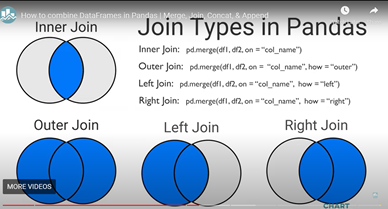
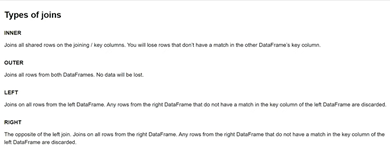

In [16]:
# outer join:
pd.merge(df1, df2, on="Col4", how="outer", suffixes= ["_l", "_r"])

,ID_l,Col1,Col2,Col3,Col4,ID_r,ColA,ColB
0,1.0,1.0,6.0,11.0,apple,1.0,8.0,12.0
1,2.0,2.0,7.0,12.0,orange,1.0,9.0,13.0
2,3.0,3.0,8.0,13.0,banana,3.0,10.0,15.0
3,5.0,4.0,9.0,14.0,strawberry,NaN,NaN,NaN
4,9.0,5.0,10.0,15.0,raspberry,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,kiwi,5.0,11.0,17.0


In [22]:
# left join:
pd.merge(df1, df2, on="Col4", how="left", suffixes= ["_l", "_r"])

,ID_l,Col1,Col2,Col3,Col4,ID_r,ColA,ColB
0,1,1,6,11,apple,1.0,8.0,12.0
1,2,2,7,12,orange,1.0,9.0,13.0
2,3,3,8,13,banana,3.0,10.0,15.0
3,5,4,9,14,strawberry,NaN,NaN,NaN
4,9,5,10,15,raspberry,NaN,NaN,NaN


In [24]:
# right join:
pd.merge(df1, df2, on="Col4", how="right", suffixes= ["_l", "_r"])

,ID_l,Col1,Col2,Col3,Col4,ID_r,ColA,ColB
0,1.0,1.0,6.0,11.0,apple,1,8,12
1,2.0,2.0,7.0,12.0,orange,1,9,13
2,3.0,3.0,8.0,13.0,banana,3,10,15
3,NaN,NaN,NaN,NaN,kiwi,5,11,17


In [25]:
# defaullt join is left:
df1.join(df2, on='ID', lsuffix='_l', rsuffix='_r')

,ID_l,Col1,Col2,Col3,Col4_l,ID_r,ColA,ColB,Col4_r
0,1,1,6,11,apple,1.0,9.0,13.0,orange
1,2,2,7,12,orange,3.0,10.0,15.0,banana
2,3,3,8,13,banana,5.0,11.0,17.0,kiwi
3,5,4,9,14,strawberry,NaN,NaN,NaN,NaN
4,9,5,10,15,raspberry,NaN,NaN,NaN,NaN


In [26]:
# we can specify different types just like with .merge()
df1.join(df2, on='ID', how ='inner', lsuffix='_l', rsuffix='_r')

,ID,ID_l,Col1,Col2,Col3,Col4_l,ID_r,ColA,ColB,Col4_r
0,1,1,1,6,11,apple,1,9,13,orange
1,2,2,2,7,12,orange,3,10,15,banana
2,3,3,3,8,13,banana,5,11,17,kiwi


# **concat()**

In [30]:
df1 = pd.DataFrame({"ID": [1,2,3,5,9],
                    "Col1":[1,2,3,4,5],
                    "Col2":[6,7,8,9,10],
                    "Col3":[11,12,13,14,15],
                    "Col4":["apple","orange","banana", "strawberry","raspberry"]
                    })
df2 = pd.DataFrame({"ID":[1,1,3,5],
                    "ColA":[8,9,10,11],
                    "ColB":[12,13,15,17],
                    "Col4":["apple","orange","banana","kiwi"]
                    })

In [31]:
df1

,ID,Col1,Col2,Col3,Col4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [32]:
df2

,ID,ColA,ColB,Col4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


In [33]:
# default axis=0 
pd.concat([df1,df2])

,ID,Col1,Col2,Col3,Col4,ColA,ColB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
0,1,NaN,NaN,NaN,apple,8.0,12.0
1,1,NaN,NaN,NaN,orange,9.0,13.0
2,3,NaN,NaN,NaN,banana,10.0,15.0
3,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [34]:
# reset the index
pd.concat([df1, df2], ignore_index= True)

,ID,Col1,Col2,Col3,Col4,ColA,ColB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
5,1,NaN,NaN,NaN,apple,8.0,12.0
6,1,NaN,NaN,NaN,orange,9.0,13.0
7,3,NaN,NaN,NaN,banana,10.0,15.0
8,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [35]:
# can side-by-side by spcifying axis=1
pd.concat([df1, df2], axis=1)

,ID,Col1,Col2,Col3,Col4,ID,ColA,ColB,Col4
0,1,1,6,11,apple,1.0,8.0,12.0,apple
1,2,2,7,12,orange,1.0,9.0,13.0,orange
2,3,3,8,13,banana,3.0,10.0,15.0,banana
3,5,4,9,14,strawberry,5.0,11.0,17.0,kiwi
4,9,5,10,15,raspberry,NaN,NaN,NaN,NaN


In [37]:
# default join is outer, but you can spcifying  inner join 
# there is no option for left or right joins 
pd.concat([df1, df2], axis=1, join= 'inner')

,ID,Col1,Col2,Col3,Col4,ID,ColA,ColB,Col4
0,1,1,6,11,apple,1,8,12,apple
1,2,2,7,12,orange,1,9,13,orange
2,3,3,8,13,banana,3,10,15,banana
3,5,4,9,14,strawberry,5,11,17,kiwi


In [38]:
pd.concat([df1, df2], axis=0, join= 'inner')

,ID,Col4
0,1,apple
1,2,orange
2,3,banana
3,5,strawberry
4,9,raspberry
0,1,apple
1,1,orange
2,3,banana
3,5,kiwi


# **APPEND()**

ANYTHİNG YOU CAN DO WİTH .APPEND() YOU CAN DO WİTH CONCAT()

In [39]:
df1.append(df2)

,ID,Col1,Col2,Col3,Col4,ColA,ColB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
0,1,NaN,NaN,NaN,apple,8.0,12.0
1,1,NaN,NaN,NaN,orange,9.0,13.0
2,3,NaN,NaN,NaN,banana,10.0,15.0
3,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [40]:
df2.append(df1)

,ID,ColA,ColB,Col4,Col1,Col2,Col3
0,1,8.0,12.0,apple,NaN,NaN,NaN
1,1,9.0,13.0,orange,NaN,NaN,NaN
2,3,10.0,15.0,banana,NaN,NaN,NaN
3,5,11.0,17.0,kiwi,NaN,NaN,NaN
0,1,NaN,NaN,apple,1.0,6.0,11.0
1,2,NaN,NaN,orange,2.0,7.0,12.0
2,3,NaN,NaN,banana,3.0,8.0,13.0
3,5,NaN,NaN,strawberry,4.0,9.0,14.0
4,9,NaN,NaN,raspberry,5.0,10.0,15.0


In [41]:
data1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                        'B': ['B0', 'B1', 'B2'],
                        'C': ['C0', 'C1', 'C2']},
                        index=[0, 1, 2])
data1

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [42]:
data2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                        'B': ['B3', 'B4', 'B5'],
                        'C': ['C3', 'C4', 'C5']},
                         index=[3, 4, 5]) 
data2

,A,B,C
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [43]:
pd.concat([data1,data2], axis=0)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
